In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [2]:
work_data = pd.read_csv("DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv", sep = ";")
work_data


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


<Axes: >

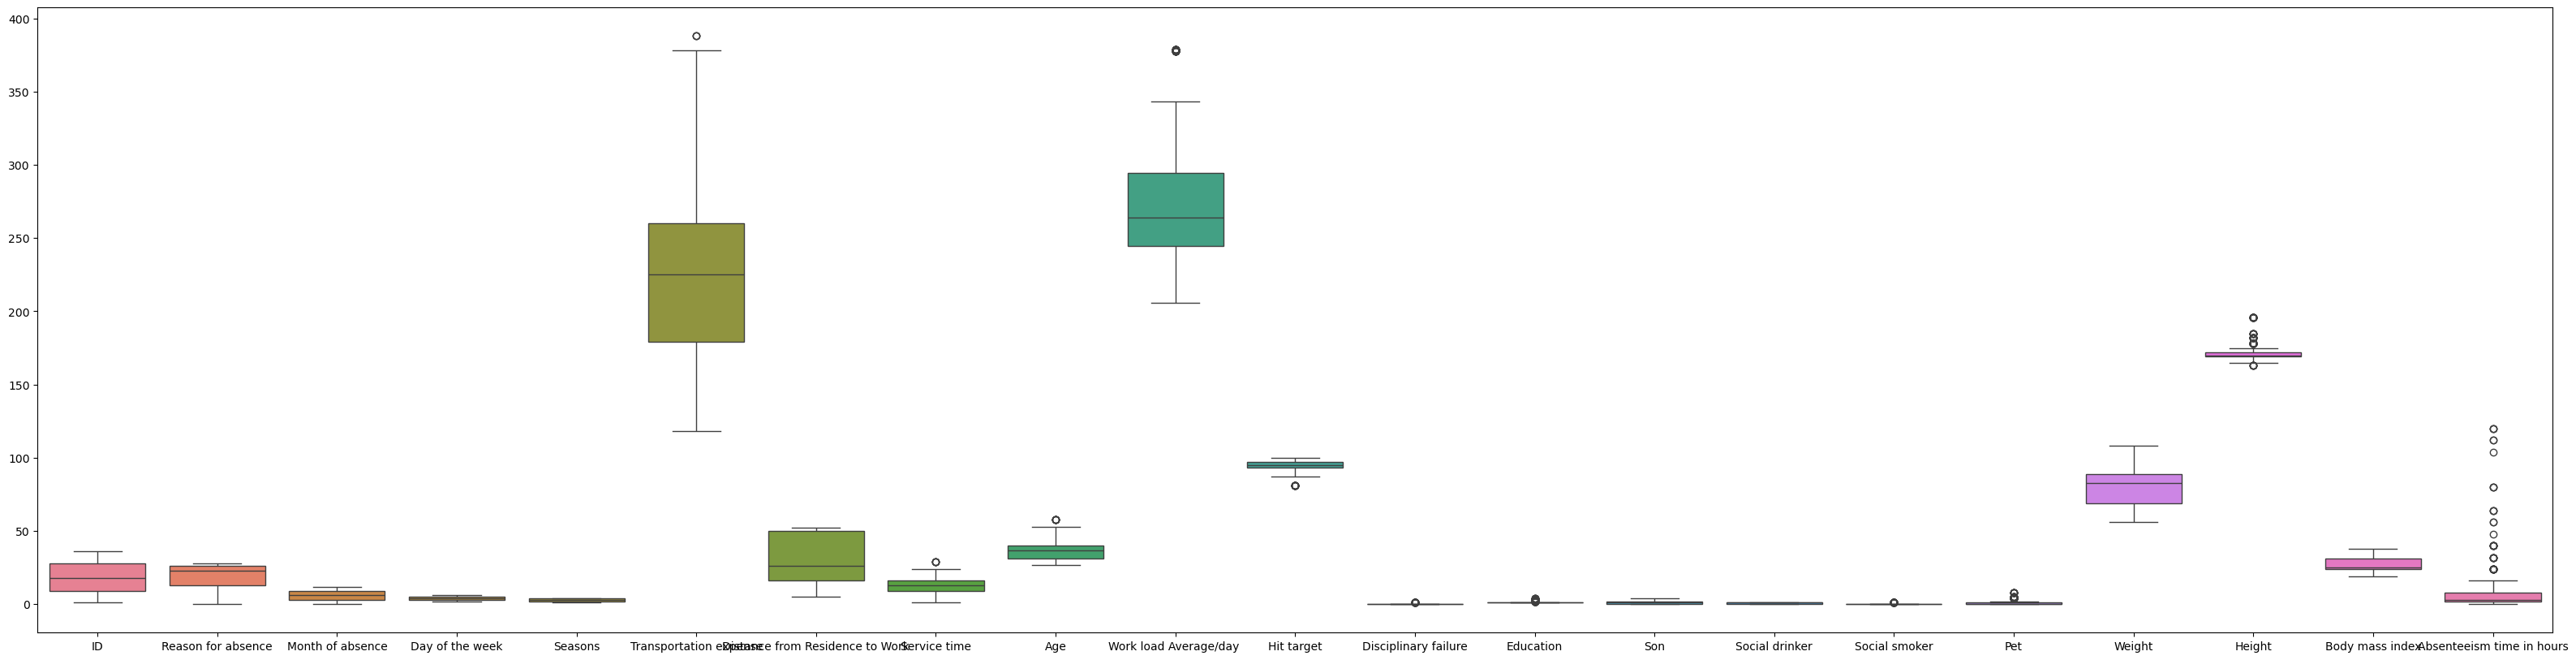

In [3]:
# outlier assessment
fig,ax=plt.subplots(figsize=(40,10))
sns.boxplot(data=work_data)

In [4]:
from the above boxplot we can observe the highest spread exist in the dependent column(Absenteeism_time_in_hours) . 
it is real fact absentism can vary employee to employee, so better to skip the outlier treatment on this datset

SyntaxError: invalid syntax (1721856979.py, line 1)

In [27]:
work_data.columns = work_data.columns.str.replace(' ', '_')
work_data

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [29]:
work_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason_for_absence               740 non-null    int64  
 2   Month_of_absence                 740 non-null    int64  
 3   Day_of_the_week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation_expense           740 non-null    int64  
 6   Distance_from_Residence_to_Work  740 non-null    int64  
 7   Service_time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work_load_Average/day_           740 non-null    float64
 10  Hit_target                       740 non-null    int64  
 11  Disciplinary_failure             740 non-null    int64  
 12  Education             

In [31]:
work_data.isnull().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

In [33]:
work_data['Seasons'].unique()

array([1, 4, 2, 3], dtype=int64)

In [35]:
bins = [0,1,2,3,4]
labels = ['Summer', 'Attum', 'Winter', 'Spring']
work_data['Seasons_c'] = pd.cut(work_data['Seasons'], bins = bins,labels = labels)

In [37]:
work_data['Day_of_the_week'].unique()

array([3, 4, 5, 6, 2], dtype=int64)

In [39]:
bins = [0,1,2,3,4,5,6,7]
labels = ['sun', 'mon', 'tue', 'wed', 'thur', 'fri','sat']
work_data['Day_of_the_week_enc'] = pd.cut(work_data['Day_of_the_week'], bins = bins, labels = labels)

In [41]:
work_data


,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,Seasons_c,Day_of_the_week_enc
0,11,26,7,3,1,289,36,13,33,239.554,...,2,1,0,1,90,172,30,4,Summer,tue
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,0,0,98,178,31,0,Summer,tue
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,0,89,170,31,2,Summer,wed
3,7,7,7,5,1,279,5,14,39,239.554,...,2,1,1,0,68,168,24,4,Summer,thur
4,11,23,7,5,1,289,36,13,33,239.554,...,2,1,0,1,90,172,30,2,Summer,thur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,2,1,0,1,90,172,30,8,Summer,tue
736,1,11,7,3,1,235,11,14,37,264.604,...,1,0,0,1,88,172,29,4,Summer,tue
737,4,0,0,3,1,118,14,13,40,271.219,...,1,1,0,8,98,170,34,0,Summer,tue
738,8,0,0,4,2,231,35,14,39,271.219,...,2,1,0,2,100,170,35,0,Attum,wed


In [43]:
work_data['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [45]:
bins = [0,1,2,3,4]
labels = ['High school', 'Graduate', 'Post graduate', 'Masters and Doctors']
work_data['Education_c'] = pd.cut(work_data['Education'], bins = bins, labels = labels)

In [47]:
work_data['Disciplinary_failure'].unique()

array([0, 1], dtype=int64)

In [49]:
bins = [-1,0,1]
labels = ['Yes', 'No']
work_data['Disciplinary_failure_c'] = pd.cut(work_data['Disciplinary_failure'], bins = bins, labels = labels)

In [51]:
work_data['Social_drinker'].unique()

array([1, 0], dtype=int64)

In [53]:
bins = [-1,0,1]
labels = ['Yes', 'No']
work_data['Social_drinker_c'] = pd.cut(work_data['Social_drinker'], bins = bins, labels = labels)

In [55]:
work_data['Social_smoker'].unique()

array([0, 1], dtype=int64)

In [57]:
bins = [-1,0,1]
labels = ['Yes', 'No']
work_data['Social_smoker_c'] = pd.cut(work_data['Social_smoker'], bins = bins, labels = labels)

In [59]:
work_data['Reason_for_absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [61]:
threshold= [14,17,21]
labels = ['group1', 'group2', 'group3', 'group4']
#functions to assign Labels based on conditions
def assign_label(values):
    if values<=threshold[0]:
        return labels [0]
    elif values<=threshold [1]:
        return labels [1]
    elif values<=threshold[2]:
        return labels [2]
    else:
        return labels [3]

#apply the function to the columns and create a new columns to create a variable


In [63]:
work_data['Reason_for_absence_c']=work_data ['Reason_for_absence'].apply(assign_label)

In [65]:
work_data['Reason_for_absence_c'].unique()

array(['group4', 'group1', 'group3', 'group2'], dtype=object)

In [67]:
work_data

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Height,Body_mass_index,Absenteeism_time_in_hours,Seasons_c,Day_of_the_week_enc,Education_c,Disciplinary_failure_c,Social_drinker_c,Social_smoker_c,Reason_for_absence_c
0,11,26,7,3,1,289,36,13,33,239.554,...,172,30,4,Summer,tue,High school,Yes,No,Yes,group4
1,36,0,7,3,1,118,13,18,50,239.554,...,178,31,0,Summer,tue,High school,No,No,Yes,group1
2,3,23,7,4,1,179,51,18,38,239.554,...,170,31,2,Summer,wed,High school,Yes,No,Yes,group4
3,7,7,7,5,1,279,5,14,39,239.554,...,168,24,4,Summer,thur,High school,Yes,No,No,group1
4,11,23,7,5,1,289,36,13,33,239.554,...,172,30,2,Summer,thur,High school,Yes,No,Yes,group4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,172,30,8,Summer,tue,High school,Yes,No,Yes,group1
736,1,11,7,3,1,235,11,14,37,264.604,...,172,29,4,Summer,tue,Post graduate,Yes,Yes,Yes,group1
737,4,0,0,3,1,118,14,13,40,271.219,...,170,34,0,Summer,tue,High school,Yes,No,Yes,group1
738,8,0,0,4,2,231,35,14,39,271.219,...,170,35,0,Attum,wed,High school,Yes,No,Yes,group1


In [69]:
work_data['Absenteeism_time_in_hours'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48], dtype=int64)

In [71]:
work_data['Absenteeism_time_in_hours'].mean()

6.924324324324324

In [73]:
work_data['Absenteeism_time_in_hours_c'] = np.where(work_data['Absenteeism_time_in_hours']>work_data['Absenteeism_time_in_hours'].mean(), 'high absent', 'low absent')

In [75]:
work_data['Absenteeism_time_in_hours_c'].unique()

array(['low absent', 'high absent'], dtype=object)

In [77]:
work_data['Hit_target'].unique()

array([ 97,  92,  93,  95,  99,  96,  94,  98,  81,  88, 100,  87,  91],
      dtype=int64)

In [79]:
work_data['Hit_target'].median()

95.0

In [81]:
work_data['Hit_target_c'] = np.where(work_data['Hit_target']>work_data['Hit_target'].median(), 'achieved', 'not achieved')

In [83]:
work_data['Hit_target_c'].unique()

array(['achieved', 'not achieved'], dtype=object)

In [85]:
work_data['Son'].unique()

array([2, 1, 0, 4, 3], dtype=int64)

In [87]:
bins = [-1,0,1]
labels = ['has Son', 'No Son']
work_data['Son_c'] = pd.cut(work_data['Son'], bins = bins, labels = labels)

In [89]:
work_data['Age'].unique()

array([33, 50, 38, 39, 28, 36, 34, 37, 41, 47, 29, 48, 32, 27, 43, 40, 31,
       30, 49, 58, 46, 53], dtype=int64)

In [91]:
threshold= (30,35,40,45,50,55)
labels=[ '25 to 30', '30 to 35', '35 to 40', '40 to 45', '45 to 50', '50 to 55', '55 to 60']
def label_assign(values):
    if values<=threshold[0]:
        return labels [0]
    elif values<=threshold[1]:
        return labels [1]
    elif values<=threshold [2]:
        return labels [2]
    elif values<=threshold [3]:
        return labels [3]
    elif values<=threshold [4]:
        return labels [4]
    elif values<=threshold [5]:
        return labels [5]
    else:
        return labels[ 6]

In [93]:
work_data['Age_c']=work_data ['Age'].apply(assign_label)

In [95]:
work_data['Age_c'].unique()

array(['30 to 35', '40 to 45', '35 to 40', '25 to 30'], dtype=object)

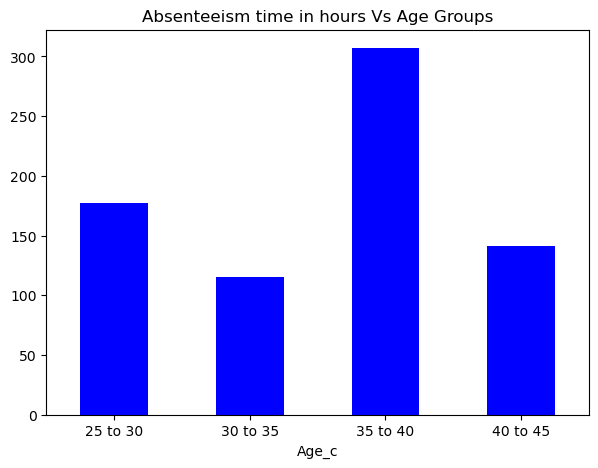

In [97]:
work_data.groupby(["Age_c"]) ["Absenteeism_time_in_hours"].count().plot(kind="bar", color="blue")
plt.title("Absenteeism time in hours Vs Age Groups")
plt.xticks (rotation=0)
plt.gcf().set_size_inches (7,5)

C:\Users\sushm\AppData\Local\Temp\ipykernel_50088\2523823699.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  work_data.groupby(["Son_c"]) ["Absenteeism_time_in_hours"].mean().plot(kind="bar")


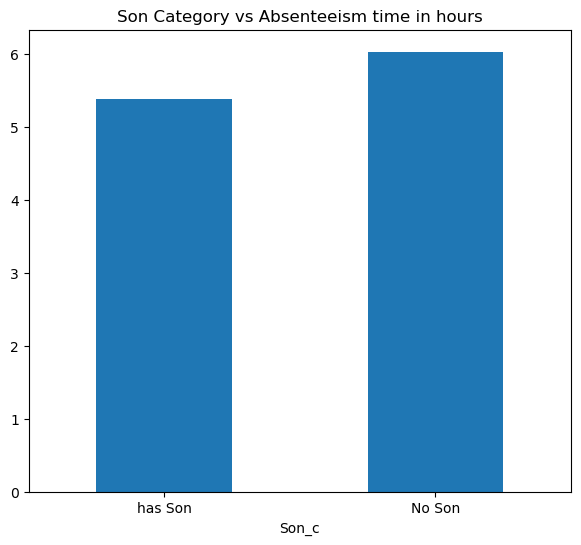

In [99]:
work_data.groupby(["Son_c"]) ["Absenteeism_time_in_hours"].mean().plot(kind="bar")
plt.title("Son Category vs Absenteeism time in hours")
plt.xticks(rotation=0)
plt.gcf().set_size_inches (7,6)

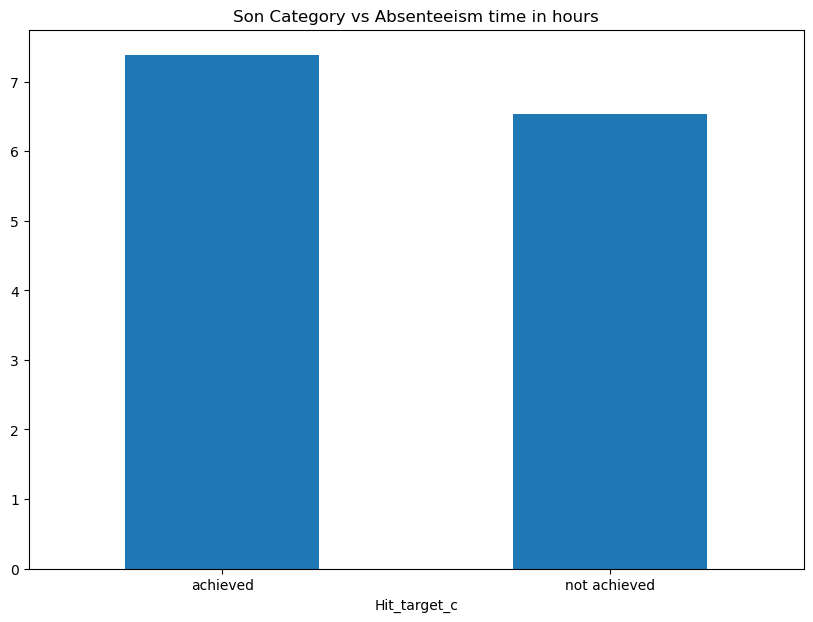

In [101]:
work_data.groupby(["Hit_target_c"]) ["Absenteeism_time_in_hours"].mean().plot(kind="bar")
plt.title("Son Category vs Absenteeism time in hours")
plt.xticks(rotation=0)
plt.gcf().set_size_inches (10,7)

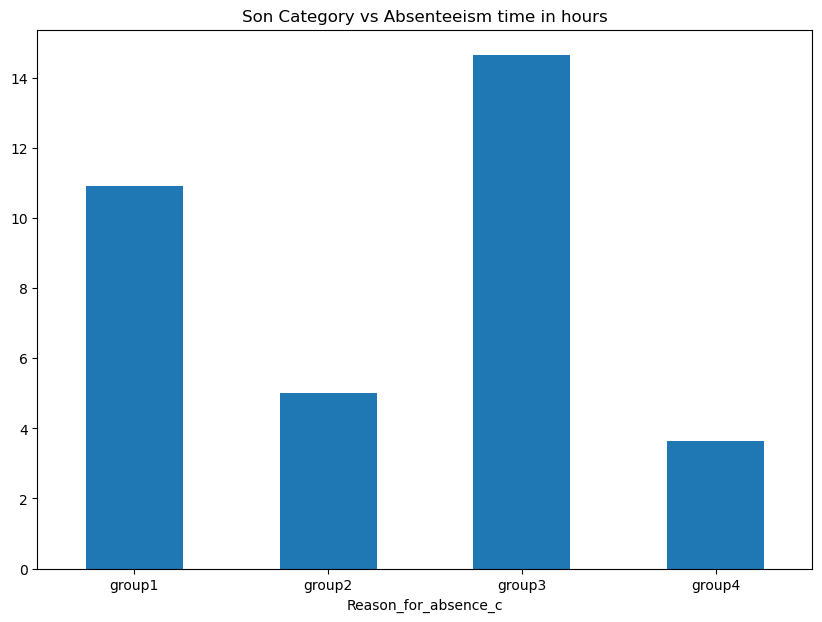

In [103]:
work_data.groupby(["Reason_for_absence_c"]) ["Absenteeism_time_in_hours"].mean().plot(kind="bar")
plt.title("Son Category vs Absenteeism time in hours")
plt.xticks(rotation=0)
plt.gcf().set_size_inches (10,7)

<Axes: xlabel='Reason_for_absence_c'>

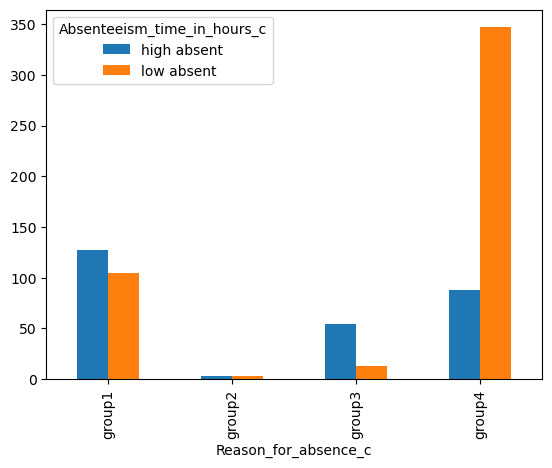

In [105]:
pd.crosstab(work_data["Reason_for_absence_c"],work_data["Absenteeism_time_in_hours_c"]).plot(kind = "bar")

<Axes: xlabel='Disciplinary_failure_c'>

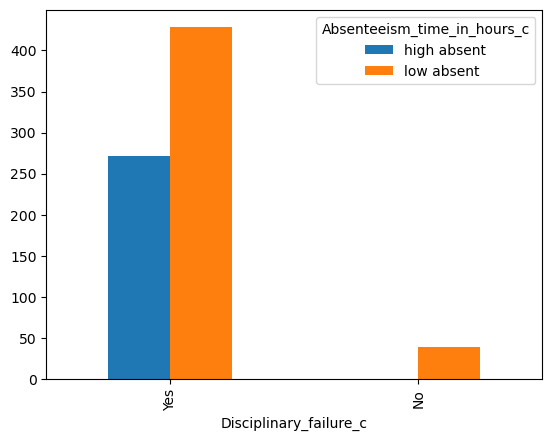

In [107]:
pd.crosstab(work_data["Disciplinary_failure_c"],work_data["Absenteeism_time_in_hours_c"]).plot(kind = "bar")

<Axes: xlabel='Education_c'>

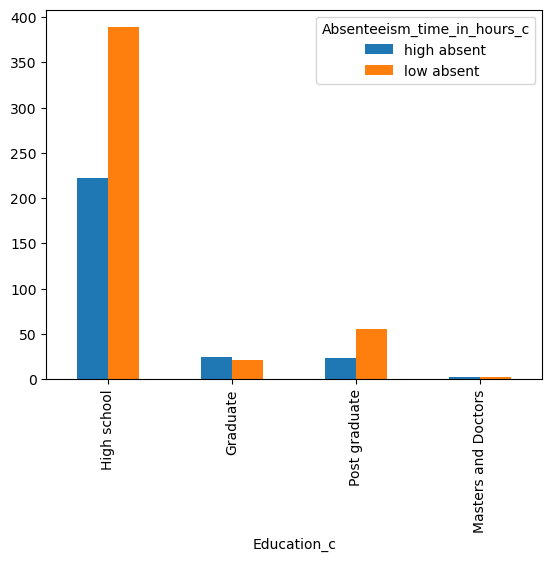

In [109]:
pd.crosstab(work_data["Education_c"],work_data["Absenteeism_time_in_hours_c"]).plot(kind = "bar")

C:\Users\sushm\AppData\Local\Temp\ipykernel_50088\1677671491.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  work_data.groupby(["Education_c"]) ["Absenteeism_time_in_hours"].mean().plot(kind="bar")


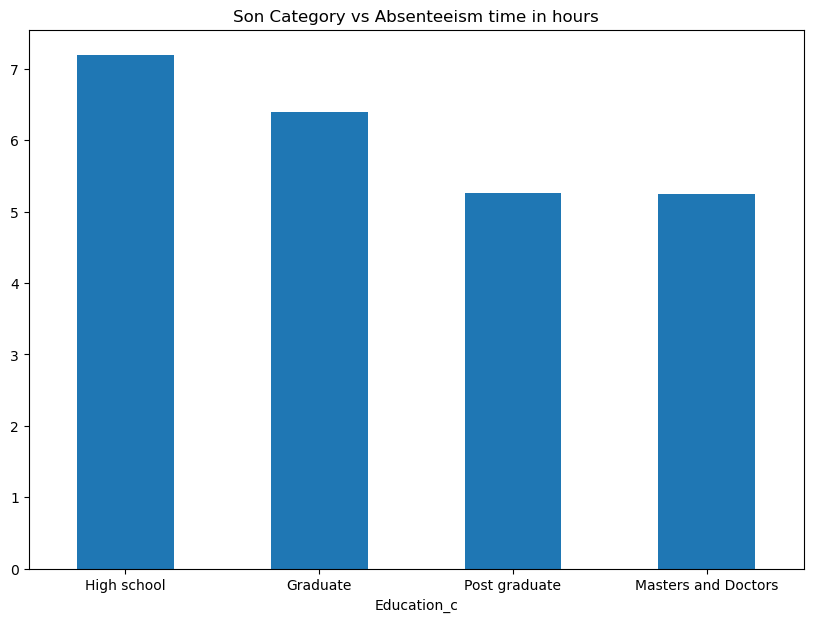

In [111]:
work_data.groupby(["Education_c"]) ["Absenteeism_time_in_hours"].mean().plot(kind="bar")
plt.title("Son Category vs Absenteeism time in hours")
plt.xticks(rotation=0)
plt.gcf().set_size_inches (10,7)

In [113]:
num = work_data.select_dtypes(exclude = ['object', 'category'])
num

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [115]:
corr=abs(num.corr()>=0.7)
corr

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
ID,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Reason_for_absence,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Month_of_absence,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Day_of_the_week,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Seasons,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Transportation_expense,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Distance_from_Residence_to_Work,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Service_time,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Age,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Work_load_Average/day_,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

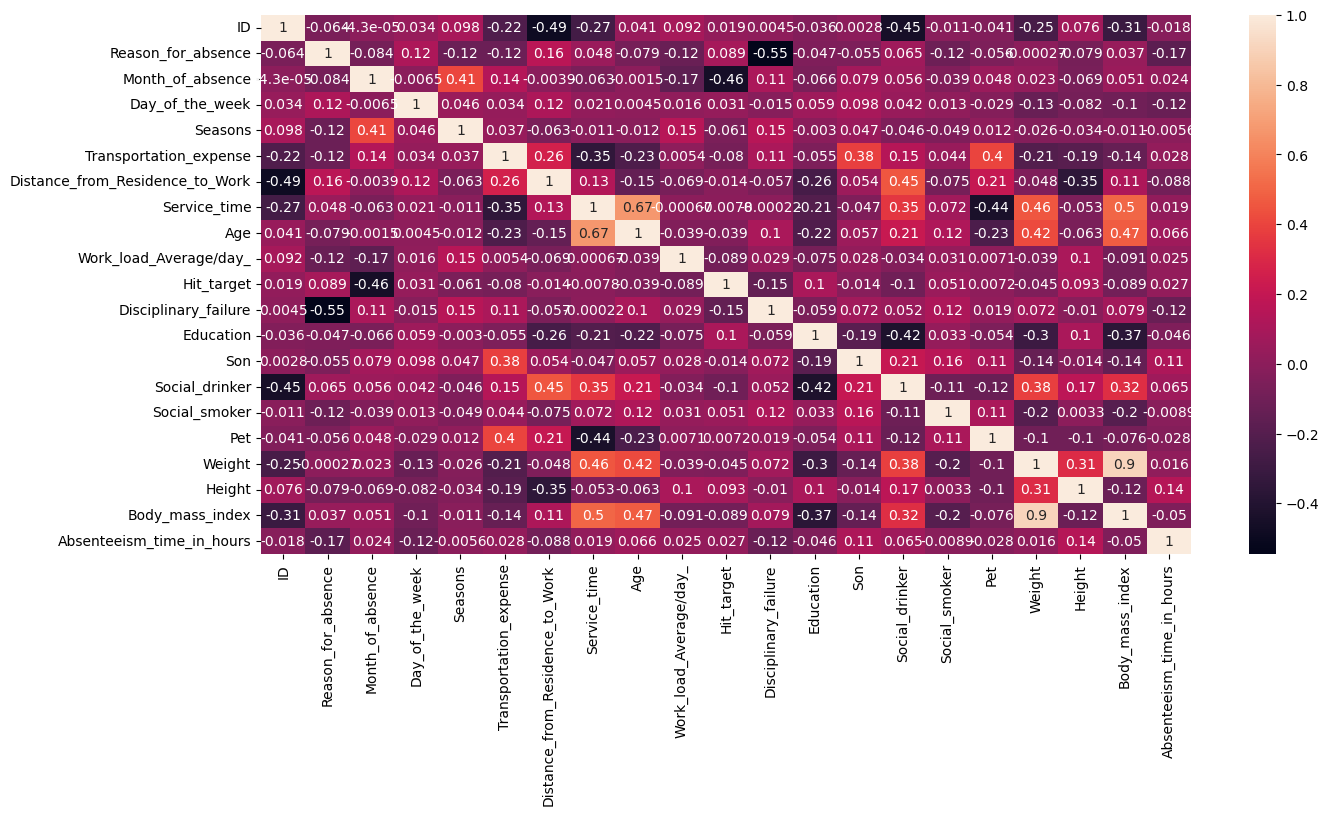

In [117]:
# Plotting heatmap
fig,ax=plt.subplots(figsize=(15,7))
sns.heatmap(num.corr(),annot=True)

In [119]:
# Dropping 'fico' column
scaled=num.drop(["Weight"],axis=1)

In [121]:
scale=StandardScaler()
df_scaled=scale.fit_transform(scaled)
df_scaled=pd.DataFrame(df_scaled,columns=scaled.columns)
df_scaled

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Height,Body_mass_index,Absenteeism_time_in_hours
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,-0.019046,0.775932,-0.219511
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.566240,0.975828,1.009438,-0.519767
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,-0.350671,1.009438,-0.369639
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.566240,-0.682295,-0.625100,-0.219511
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,-0.019046,0.775932,-0.369639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.637161,-0.618937,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.176427,-0.420423,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,-0.019046,0.775932,0.080744
736,-1.545113,-0.974905,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.176427,-0.420423,-0.239046,2.538869,-0.017234,-1.145644,-0.280566,0.192850,-0.019046,0.542427,-0.219511
737,-1.272728,-2.280124,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0.548314,-0.006949,0.109131,-0.239046,-0.433857,-0.017234,0.872872,-0.280566,5.506478,-0.350671,1.709954,-0.519767
738,-0.909547,-2.280124,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0.393859,-0.006949,0.109131,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.951940,-0.350671,1.943459,-0.519767


In [123]:
df_scaled.corr()[['Absenteeism_time_in_hours']].sort_values(['Absenteeism_time_in_hours'])

,Absenteeism_time_in_hours
Reason_for_absence,-0.173116
Day_of_the_week,-0.124361
Disciplinary_failure,-0.124248
Distance_from_Residence_to_Work,-0.088363
Body_mass_index,-0.049719
Education,-0.046235
Pet,-0.028277
ID,-0.017997
Social_smoker,-0.008936
Seasons,-0.005615


In [125]:
select_columns = df_scaled.loc[:,['Absenteeism_time_in_hours', 'Reason_for_absence']]
select_columns

,Absenteeism_time_in_hours,Reason_for_absence
0,-0.219511,0.804938
1,-0.519767,-2.280124
2,-0.369639,0.448970
3,-0.219511,-1.449530
4,-0.369639,0.448970
...,...,...
735,0.080744,-0.618937
736,-0.219511,-0.974905
737,-0.519767,-2.280124
738,-0.519767,-2.280124


In [127]:
X = np.array(select_columns['Reason_for_absence']).reshape(-1,1)
X

array([[ 0.80493838],
       [-2.28012426],
       [ 0.44896961],
       [-1.44953047],
       [ 0.44896961],
       [ 0.44896961],
       [ 0.33031336],
       [ 0.44896961],
       [-0.02565541],
       [ 0.33031336],
       [-2.161468  ],
       [-2.161468  ],
       [-0.97490545],
       [-0.97490545],
       [ 0.44896961],
       [-0.61893668],
       [ 0.44896961],
       [ 0.2116571 ],
       [-0.97490545],
       [ 0.44896961],
       [-1.0935617 ],
       [-0.97490545],
       [-0.73759294],
       [ 1.04225089],
       [-0.14431166],
       [ 0.68628213],
       [ 0.44896961],
       [ 1.04225089],
       [-0.14431166],
       [ 0.44896961],
       [-0.14431166],
       [-0.14431166],
       [ 0.44896961],
       [-0.14431166],
       [ 0.44896961],
       [ 0.44896961],
       [ 0.56762587],
       [-0.97490545],
       [ 1.04225089],
       [ 0.44896961],
       [ 0.44896961],
       [ 0.44896961],
       [ 0.44896961],
       [-0.02565541],
       [ 0.44896961],
       [ 0

In [129]:
y = np.array(select_columns['Absenteeism_time_in_hours']).reshape(-1,1)
y

array([[-2.19511113e-01],
       [-5.19766608e-01],
       [-3.69638860e-01],
       [-2.19511113e-01],
       [-3.69638860e-01],
       [-3.69638860e-01],
       [ 8.07443833e-02],
       [-2.19511113e-01],
       [ 2.48278835e+00],
       [ 8.07443833e-02],
       [ 8.07443833e-02],
       [ 8.07443833e-02],
       [ 8.07443833e-02],
       [-4.44702734e-01],
       [-2.19511113e-01],
       [ 8.07443833e-02],
       [-3.69638860e-01],
       [ 8.07443833e-02],
       [ 8.07443833e-02],
       [-3.69638860e-01],
       [ 8.07443833e-02],
       [-4.44702734e-01],
       [ 2.48278835e+00],
       [-2.19511113e-01],
       [ 8.07443833e-02],
       [ 5.68050938e-03],
       [-4.44702734e-01],
       [-2.19511113e-01],
       [ 8.07443833e-02],
       [-3.69638860e-01],
       [ 8.07443833e-02],
       [ 8.07443833e-02],
       [-2.19511113e-01],
       [ 8.07443833e-02],
       [-3.69638860e-01],
       [-4.44702734e-01],
       [ 8.07443833e-02],
       [-2.19511113e-01],
       [ 8.0

In [131]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.3, random_state = 300)

In [133]:
s1_model = LinearRegression().fit(X1_train,y1_train)
s1_model

LinearRegression()

In [135]:
y1_pred = s1_model.predict(X1_test)
print(y1_pred)

[[ 0.12011668]
 [-0.15719851]
 [ 0.15709204]
 [-0.10173547]
 [ 0.17557972]
 [ 0.36045651]
 [-0.06476011]
 [ 0.34196884]
 [ 0.00919061]
 [-0.15719851]
 [-0.06476011]
 [ 0.101629  ]
 [-0.15719851]
 [-0.06476011]
 [-0.06476011]
 [ 0.15709204]
 [ 0.24953044]
 [-0.06476011]
 [-0.15719851]
 [-0.04627243]
 [-0.15719851]
 [ 0.36045651]
 [-0.15719851]
 [-0.15719851]
 [-0.15719851]
 [-0.15719851]
 [-0.13871083]
 [-0.15719851]
 [-0.15719851]
 [-0.04627243]
 [-0.13871083]
 [ 0.36045651]
 [-0.10173547]
 [-0.15719851]
 [-0.06476011]
 [-0.06476011]
 [-0.06476011]
 [-0.13871083]
 [-0.15719851]
 [-0.04627243]
 [-0.06476011]
 [-0.06476011]
 [-0.13871083]
 [-0.06476011]
 [-0.06476011]
 [-0.06476011]
 [-0.06476011]
 [ 0.15709204]
 [-0.06476011]
 [ 0.36045651]
 [-0.13871083]
 [-0.06476011]
 [ 0.00919061]
 [-0.13871083]
 [-0.06476011]
 [-0.06476011]
 [-0.15719851]
 [ 0.17557972]
 [-0.15719851]
 [ 0.15709204]
 [-0.06476011]
 [ 0.00919061]
 [-0.12022315]
 [-0.13871083]
 [-0.06476011]
 [-0.13871083]
 [-0.06476

In [137]:
# print intercept and slope of the model
print("interscept", s1_model.intercept_)
print("slope", s1_model.coef_)

interscept [0.00519327]
slope [[-0.15580872]]


In [139]:
# Evaluate MSE, MAE, RMSE
MSE = mean_squared_error(y1_test, y1_pred)
print(MSE)
MAE = mean_absolute_error(y1_test, y1_pred)
print(MAE)
RMSE = mean_squared_error(y1_test, y1_pred, squared = False)
print(RMSE)

0.6925500156914643
0.3995057143863282
0.8321958998285586


C:\Users\sushm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [141]:
from sklearn.metrics import r2_score
R2 = r2_score(y1_test, y1_pred)
R2

0.0537586356282308

In [143]:
# Two features
X2=np.array(df_scaled[["Reason_for_absence","Disciplinary_failure"]]).reshape(-1,2)
y2=np.array(df_scaled["Absenteeism_time_in_hours"])

In [145]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 400)

In [147]:
s2_model = LinearRegression().fit(X2_train,y2_train)
s2_model

LinearRegression()

In [149]:
y2_pred = s2_model.predict(X2_test)
print(y2_pred)

[-0.06222259 -0.27433076 -0.27433076 -0.06222259  0.10746394  0.36199375
 -0.06222259  0.65894519  0.10746394 -0.06222259 -0.27433076 -0.27433076
 -0.06222259 -0.51976661 -0.06222259 -0.23190913  0.36199375  0.61652355
 -0.23190913 -0.27433076 -0.06222259  0.40441538  0.10746394 -0.23190913
 -0.14706586 -0.23190913  0.65894519  0.10746394  0.87105336 -0.06222259
 -0.27433076  0.40441538 -0.06222259 -0.27433076 -0.14706586 -0.14706586
 -0.27433076 -0.06222259 -0.18948749 -0.23190913  0.48925865 -0.51976661
  0.61652355 -0.06222259  0.87105336 -0.23190913 -0.01980096 -0.06222259
  0.65894519  0.36199375  0.14988558  0.14988558 -0.27433076 -0.18948749
 -0.06222259 -0.06222259  0.36199375 -0.27433076 -0.06222259 -0.27433076
 -0.51976661 -0.23190913 -0.14706586 -0.51976661 -0.14706586  0.31957212
 -0.06222259  0.87105336 -0.01980096  0.87105336 -0.23190913  0.48925865
 -0.27433076  0.36199375 -0.06222259  0.87105336  0.48925865 -0.06222259
 -0.27433076 -0.06222259 -0.27433076  0.91347499 -0

In [151]:
# print intercept and slope of the model
print("interscept", s2_model.intercept_)
print("slope", s2_model.coef_)

interscept 0.02081918084334754
slope [-0.35751705 -0.3240908 ]


In [153]:
# Evaluate MSE, MAE, RMSE
MSE = mean_squared_error(y2_test, y2_pred)
print(MSE)
MAE = mean_absolute_error(y2_test, y2_pred)
print(MAE)
RMSE = mean_squared_error(y2_test, y2_pred, squared = False)
print(RMSE)

0.9282320484498343
0.45754212343018114
0.9634479998680958


C:\Users\sushm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [155]:
R2 = r2_score(y2_test, y2_pred)
R2

0.07637319355442751

In [157]:
# Three features
X3=np.array(df_scaled[["Reason_for_absence","Disciplinary_failure", "Distance_from_Residence_to_Work"]]).reshape(-1,3)
y3=np.array(df_scaled["Absenteeism_time_in_hours"])

In [159]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.1, random_state = 200)

In [161]:
s3_model = LinearRegression().fit(X3_train,y3_train)
s3_model

LinearRegression()

In [163]:
y3_pred = s3_model.predict(X3_test)
print(y3_pred)

[-0.52878611  0.60471225 -0.13378718 -0.5032738   0.35019252 -0.22703062
 -0.33892591  0.06165638 -0.14064765  0.27649028 -0.54579432  0.63604483
  0.34735782 -0.52311671 -0.33892591 -0.29789817  0.14654657  0.31751803
 -0.29789817 -0.13378718 -0.33042181  0.39957352 -0.2143499   0.40240822
 -0.06291964 -0.58548015 -0.01756441 -0.16899467 -0.26522367 -0.06291964
 -0.22703062  0.13371499  0.34735782  0.18757432 -0.13378718 -0.08709003
  0.1535579   0.34735782 -0.0033909   0.61903662  0.30633008 -0.26805837
  0.47327576  0.24396664  0.03315851 -0.13378718  0.27365558 -0.16899467
 -0.23120725 -0.06291964 -0.28223188 -0.29789817 -0.48343089  0.40807762
 -0.5032738  -0.2143499   0.35854577  0.82685919  0.10119135  0.18190491
 -0.11095871 -0.26805837  0.49595338 -0.22703062 -0.26805837 -0.07709315
 -0.23687665  0.0303238  -0.28223188  0.36436603  0.14654657 -0.29789817
 -0.2143499   0.07284433]


In [165]:
# print intercept and slope of the model
print("interscept", s3_model.intercept_)
print("slope", s3_model.coef_)

interscept 0.006297690984936093
slope [-0.34576977 -0.31680031 -0.04202944]


In [167]:
# Evaluate MSE, MAE, RMSE
MSE = mean_squared_error(y3_test, y3_pred)
print(MSE)
MAE = mean_absolute_error(y3_test, y3_pred)
print(MAE)
RMSE = mean_squared_error(y3_test, y3_pred, squared = False)
print(RMSE)

0.4269471284413151
0.34103558500432685
0.6534119132991953


C:\Users\sushm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [169]:
R3 = r2_score(y3_test, y3_pred)
R3

0.09995874608911359

In [171]:
# four features
X4=np.array(df_scaled[["Reason_for_absence","Disciplinary_failure", "Distance_from_Residence_to_Work", "Body_mass_index"]]).reshape(-1,4)
y4=np.array(df_scaled["Absenteeism_time_in_hours"])

In [173]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.1, random_state = 200)

In [175]:
s4_model = LinearRegression().fit(X4_train,y4_train)
s4_model

LinearRegression()

In [177]:
y4_pred = s4_model.predict(X4_test)
print(y4_pred)

[-0.54968169  0.58700787 -0.1481856  -0.54420047  0.36195383 -0.19729519
 -0.35240601  0.05052863 -0.14713178  0.26025521 -0.57373916  0.63764827
  0.37452195 -0.50213111 -0.35240601 -0.31156193  0.13877679  0.33935552
 -0.31156193 -0.1481856  -0.36333101  0.38278746 -0.22587666  0.41612681
 -0.03391886 -0.55846164 -0.02459954 -0.21273171 -0.25070739 -0.05304698
 -0.19729519  0.10853972  0.37452195  0.17962087 -0.1481856  -0.06361655
  0.16976216  0.37452195  0.00437481  0.62124204  0.31072414 -0.26109301
  0.48448608  0.20848613  0.04853008 -0.1481856   0.27282333 -0.21273171
 -0.24849992 -0.05304698 -0.27476486 -0.31156193 -0.49828052  0.37186246
 -0.54420047 -0.22587666  0.34194338  0.83058823  0.11032935  0.185629
 -0.09427145 -0.25726739  0.4987098  -0.19729519 -0.25726739 -0.07054445
 -0.2424918   0.05344695 -0.27476486  0.31824135  0.13877679 -0.31156193
 -0.22587666  0.06003191]


In [179]:
# print intercept and slope of the model
print("interscept", s4_model.intercept_)
print("slope", s4_model.coef_)

interscept 0.006008457122305632
slope [-0.3442219  -0.31508501 -0.04054186 -0.01638344]


In [181]:
# Evaluate MSE, MAE, RMSE
MSE = mean_squared_error(y4_test, y4_pred)
print(MSE)
MAE = mean_absolute_error(y4_test, y4_pred)
print(MAE)
RMSE = mean_squared_error(y4_test, y4_pred, squared = False)
print(RMSE)

0.4294514988251419
0.3432585492063406
0.6553254907487895


C:\Users\sushm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [183]:
R4 = r2_score(y4_test, y4_pred)
R4

0.0946793180045502

In [185]:
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual':label,'Predicted':predictions})
    df_results['Residuals'] = abs(df_results['Actual'])-abs(df_results['Predicted'])
    return df_results
# def Linear_Regression(model,feature,label):
#     df_results=calculating_residuals(model,feature,label)
#     sns.lmplot(x="Actual",y="Predictions",data=df_results,fit_reg=False)
#     line_cords=np.arange(df_results.min().min(),df_results.max().max())
#     plt.plot(line_cords,line_cords,color="red",linestyle="--")
#     plt.show()

In [187]:
def homoscedasticity_assumption(model,features,label):
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    print('Residuals should have relative constant variance')
    df_results = calculate_residuals(model,features,label)
    print(df_results)
    plt.subplots(figsize=(8,6))
    ax = plt.subplot(111)
    plt.scatter(x=df_results.index,y=df_results.Residuals,alpha=0.5)
    plt.plot(np.repeat(0,df_results.index.max()),color="red",linestyle = "--")
    plt.title("residual plot")
    plt.xlabel("index")
    plt.ylabel("residual")
    plt.show()

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance
      Actual  Predicted  Residuals
0  -0.519767  -0.528786  -0.009020
1   0.080744   0.604712  -0.523968
2  -0.294575  -0.133787   0.160788
3  -0.519767  -0.503274   0.016493
4   0.080744   0.350193  -0.269448
..       ...        ...        ...
69  0.681255   0.364366   0.316889
70 -0.444703   0.146547   0.298156
71 -0.294575  -0.297898  -0.003323
72  0.080744  -0.214350  -0.133606
73  0.080744   0.072844   0.007900

[74 rows x 3 columns]


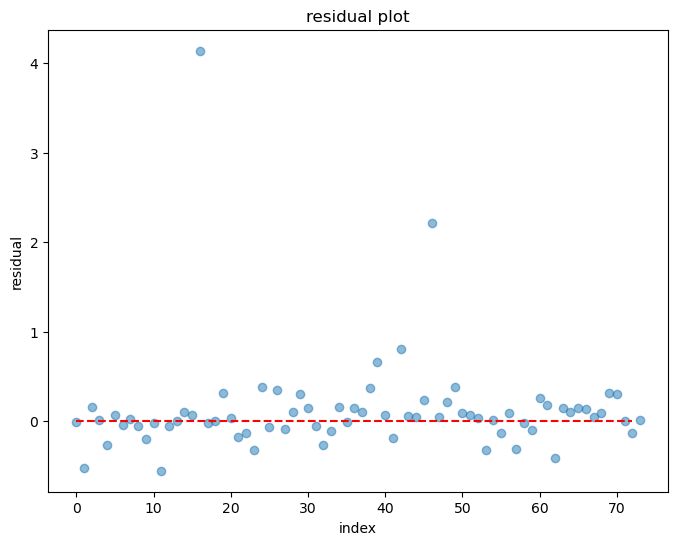

In [189]:
homoscedasticity_assumption(s3_model,X3_test,y3_test)

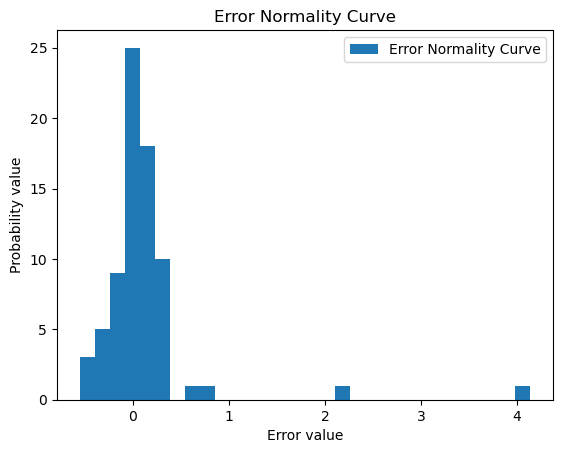

In [191]:
# Code to Error Normality curve
df_results=calculate_residuals(s3_model,X3_test,y3_test)
plt.hist(df_results.Residuals,bins=30,label="Error Normality Curve")
plt.xlabel("Error value")
plt.ylabel("Probability value")
plt.title("Error Normality Curve")
plt.legend()
plt.show()

#### Task 3:

In [193]:
work_data

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Day_of_the_week_enc,Education_c,Disciplinary_failure_c,Social_drinker_c,Social_smoker_c,Reason_for_absence_c,Absenteeism_time_in_hours_c,Hit_target_c,Son_c,Age_c
0,11,26,7,3,1,289,36,13,33,239.554,...,tue,High school,Yes,No,Yes,group4,low absent,achieved,NaN,30 to 35
1,36,0,7,3,1,118,13,18,50,239.554,...,tue,High school,No,No,Yes,group1,low absent,achieved,No Son,40 to 45
2,3,23,7,4,1,179,51,18,38,239.554,...,wed,High school,Yes,No,Yes,group4,low absent,achieved,has Son,35 to 40
3,7,7,7,5,1,279,5,14,39,239.554,...,thur,High school,Yes,No,No,group1,low absent,achieved,NaN,35 to 40
4,11,23,7,5,1,289,36,13,33,239.554,...,thur,High school,Yes,No,Yes,group4,low absent,achieved,NaN,30 to 35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,tue,High school,Yes,No,Yes,group1,high absent,not achieved,NaN,30 to 35
736,1,11,7,3,1,235,11,14,37,264.604,...,tue,Post graduate,Yes,Yes,Yes,group1,low absent,not achieved,No Son,35 to 40
737,4,0,0,3,1,118,14,13,40,271.219,...,tue,High school,Yes,No,Yes,group1,low absent,not achieved,No Son,35 to 40
738,8,0,0,4,2,231,35,14,39,271.219,...,wed,High school,Yes,No,Yes,group1,low absent,not achieved,NaN,35 to 40


In [195]:
work_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason_for_absence               740 non-null    int64   
 2   Month_of_absence                 740 non-null    int64   
 3   Day_of_the_week                  740 non-null    int64   
 4   Seasons                          740 non-null    int64   
 5   Transportation_expense           740 non-null    int64   
 6   Distance_from_Residence_to_Work  740 non-null    int64   
 7   Service_time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work_load_Average/day_           740 non-null    float64 
 10  Hit_target                       740 non-null    int64   
 11  Disciplinary_failure             740 non-null    int64   
 12  Educatio

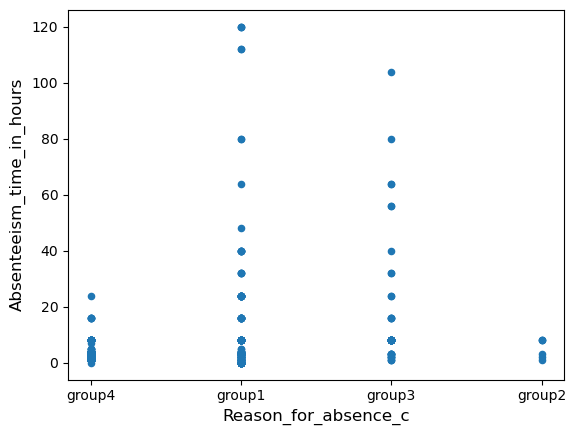

In [197]:
fig, ax = plt.subplots()
ax.set_xlabel('xlabel', fontsize = 12)
ax.set_ylabel('ylabel', fontsize = 12)
work_data.plot.scatter(x ='Reason_for_absence_c', y ='Absenteeism_time_in_hours', ax = ax)
plt.show()

C:\Users\sushm\AppData\Local\Temp\ipykernel_50088\1716170798.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  work_data.groupby(["Seasons_c"]) ["Absenteeism_time_in_hours"].count().plot(kind="bar")


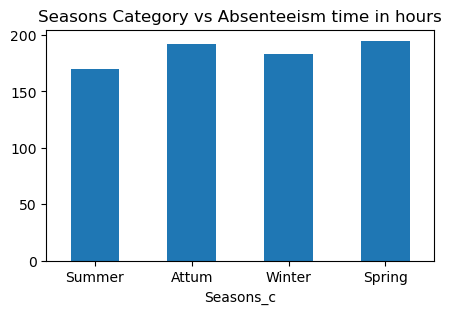

In [199]:
work_data.groupby(["Seasons_c"]) ["Absenteeism_time_in_hours"].count().plot(kind="bar")
plt.title("Seasons Category vs Absenteeism time in hours")
plt.xticks(rotation=0)
plt.gcf().set_size_inches (5,3)

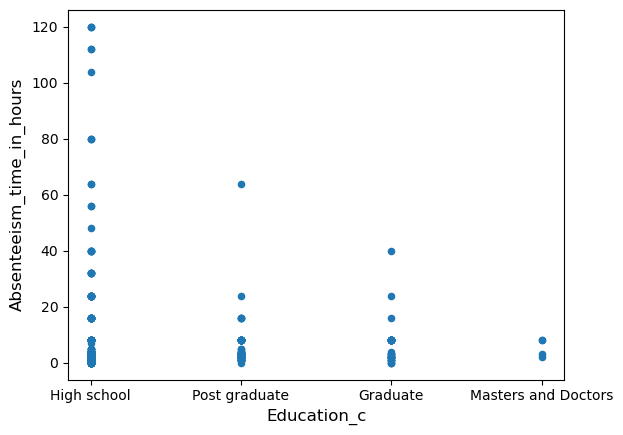

In [201]:
fig, ax = plt.subplots()
ax.set_xlabel('xlabel', fontsize = 12)
ax.set_ylabel('ylabel', fontsize = 12)
work_data.plot.scatter(x ='Education_c', y ='Absenteeism_time_in_hours', ax = ax)
plt.show()

### PROJECT 2:

In [203]:
X = df_scaled.drop(columns = ["Absenteeism_time_in_hours"])
y = df_scaled["Absenteeism_time_in_hours"]

In [205]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)
y_test

196    0.080744
187    1.281766
14    -0.219511
31     0.080744
682    4.284321
         ...   
695    0.080744
519    0.080744
520   -0.294575
240    0.080744
97    -0.294575
Name: Absenteeism_time_in_hours, Length: 148, dtype: float64

In [207]:
print(X_train.shape)
print(y_train.shape)

(592, 19)
(592,)


In [209]:
y_train = (y_train> y_train.median()).astype(int)

In [211]:
y_test = (y_test>y_test.median()).astype(int)

In [213]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [215]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [217]:
from sklearn.metrics import confusion_matrix
# confusion matrix is the table that helps visualize the performance of classification model.
print(confusion_matrix(y_test,y_pred))
# the function calculates the number of correctly and incorrectly classified instances for each class and returns the resulting confusion matrix
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)

[[56 20]
 [13 59]]
56 20 13 59


In [219]:
# ROC Score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print("recall_score:",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Precision score:",precision_score(y_test,y_pred))

recall_score: 0.8194444444444444
f1_score: 0.7814569536423841
Accuracy_score: 0.777027027027027
Precision score: 0.7468354430379747


In [221]:
# ROC curve
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print(roc)

0.8510599415204679


In [223]:
from sklearn.metrics import RocCurveDisplay

<Figure size 700x500 with 0 Axes>

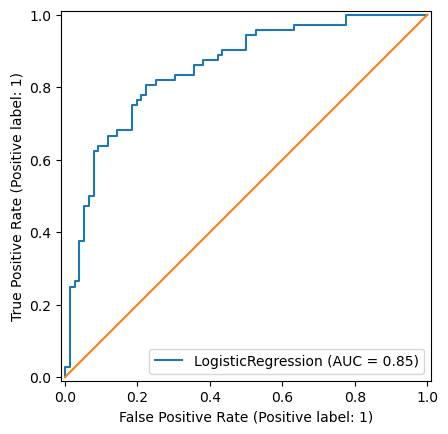

In [225]:
plt.figure(figsize=(7,5))
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.plot([0,1],[0,1])
plt.show()

### By using KNN Models

In [228]:
X = df_scaled.drop(columns = ["Absenteeism_time_in_hours"])
y = df_scaled["Absenteeism_time_in_hours"]

In [230]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)
y_test

196    0.080744
187    1.281766
14    -0.219511
31     0.080744
682    4.284321
         ...   
695    0.080744
519    0.080744
520   -0.294575
240    0.080744
97    -0.294575
Name: Absenteeism_time_in_hours, Length: 148, dtype: float64

In [244]:
y_train = (y_train> y_train.median()).astype(int)

In [246]:
y_test = (y_test>y_test.median()).astype(int)

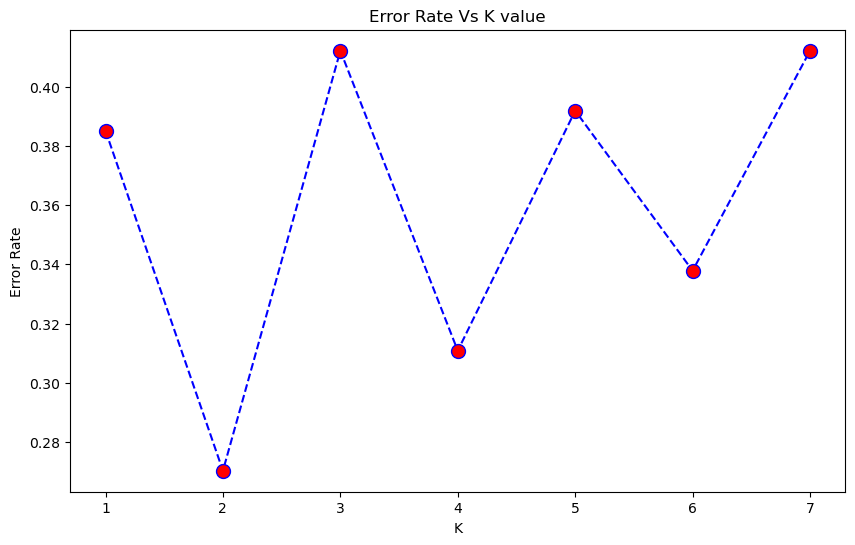

In [248]:
from sklearn import neighbors
error_rate=[]
for i in range(1,8):
    cls_food=neighbors.KNeighborsClassifier(n_neighbors=i)
    cls_food.fit(X_train,y_train)
    pred_i=cls_food.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,8),error_rate,color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=10) 
plt.title("Error Rate Vs K value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

In [ ]:
# Optimum K value
k=2

In [252]:
# learning the classifier
w_data=neighbors.KNeighborsClassifier(n_neighbors=2)
w_data.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [254]:
# Model Properties
print(w_data.classes_)
print(w_data.n_neighbors)

[0 1]
2


In [256]:
# Using the trained model to predict the outcome of the X_Test dataset
y_pred_data=w_data.predict(X_test)
y_pred_data

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [258]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print("Accuracy score",accuracy_score(y_test,y_pred_data))
print("Recall score",recall_score(y_test,y_pred_data,average="micro"))
print("F1 score",f1_score(y_test,y_pred_data,average="micro"))
print("precision score",precision_score(y_test,y_pred_data,average="micro"))

Accuracy score 0.7297297297297297
Recall score 0.7297297297297297
F1 score 0.7297297297297297
precision score 0.7297297297297297


In [260]:
y_pred_prob=w_data.predict_proba(X_test)[:, 1]

In [264]:
roc_med=roc_auc_score(y_test, y_pred_prob,multi_class="ovr",average="macro")
roc_med

0.7563965884861408

In [282]:
KMeans_model=KMeans(n_clusters=2)
KMeans_model.fit(X)

C:\Users\sushm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=2)

In [284]:
Kmean_centroid=KMeans_model.cluster_centers_
Kmean_centroid

array([[-0.61427609,  0.08227302,  0.11299024,  0.06956627, -0.06109577,
         0.45389741,  0.71966422,  0.25245156,  0.10695454, -0.10907847,
        -0.15782237,  0.0759707 , -0.40535182,  0.18741905,  0.71802654,
        -0.01722398,  0.1242198 , -0.33249941,  0.33195204],
       [ 0.5978954 , -0.08007908, -0.10997716, -0.06771117,  0.05946655,
        -0.44179348, -0.70047317, -0.24571952, -0.10410242,  0.10616971,
         0.15361378, -0.07394481,  0.39454243, -0.18242121, -0.69887916,
         0.01676468, -0.12090727,  0.32363276, -0.32309999]])

In [286]:
labels = KMeans_model.labels_
print(labels)

[0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 1 1 0 1 

#### Create Labels

In [289]:
label=KMeans_model.labels_
label

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [293]:
cluster_1=KMeans_model.cluster_centers_[0]
cluster_1

array([-0.61427609,  0.08227302,  0.11299024,  0.06956627, -0.06109577,
        0.45389741,  0.71966422,  0.25245156,  0.10695454, -0.10907847,
       -0.15782237,  0.0759707 , -0.40535182,  0.18741905,  0.71802654,
       -0.01722398,  0.1242198 , -0.33249941,  0.33195204])

In [295]:
cluster_2=KMeans_model.cluster_centers_[1]
cluster_2

array([ 0.5978954 , -0.08007908, -0.10997716, -0.06771117,  0.05946655,
       -0.44179348, -0.70047317, -0.24571952, -0.10410242,  0.10616971,
        0.15361378, -0.07394481,  0.39454243, -0.18242121, -0.69887916,
        0.01676468, -0.12090727,  0.32363276, -0.32309999])

In [299]:
len(KMeans_model.cluster_centers_.shape)

2

In [301]:
centroid_x = cluster_centroid[0]
centroid_y = cluster_centroid[1]
print(centroid_x)
print(centroid_y)

-0.6142760925472186
0.08227302290860412


In [303]:
colors=plt.cm.Spectral(np.linspace(0,1,len(set(labels)))) 
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

In [305]:
X_test

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Height,Body_mass_index
196,1.360333,1.042251,-0.676863,1.467667,0.409877,0.398617,-0.312346,0.329981,1.629496,1.408131,0.373908,-0.239046,-0.433857,0.893723,-1.145644,-0.280566,0.192850,-1.179732,1.242943
187,0.543176,-0.737593,-0.676863,0.059924,0.409877,0.368725,-0.312346,0.786403,0.702769,1.408131,0.373908,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,-0.350671,-0.858606
14,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,-0.350671,1.009438
31,-1.454318,-0.144312,0.487971,0.763796,-1.390175,0.204318,-0.042564,-0.126441,1.783951,-1.679999,-0.685201,-0.239046,-0.433857,-0.017234,-1.145644,3.564226,3.229209,-1.511357,1.476449
682,0.724767,-0.025655,-0.385655,1.467667,0.409877,1.175816,-0.244901,0.101770,1.011678,-0.866840,1.168240,-0.239046,-0.433857,0.893723,0.872872,3.564226,0.192850,0.478391,-0.391595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-0.092390,-1.093562,-0.385655,0.059924,0.409877,-0.632665,-0.514683,1.014614,0.548314,-0.866840,1.168240,-0.239046,1.052506,0.893723,-1.145644,3.564226,-0.566240,-0.350671,-1.092111
519,-0.455571,0.804938,1.070388,-0.643947,1.309902,2.207098,-0.851911,-0.126441,-0.841778,0.342357,-0.949978,-0.239046,-0.433857,1.804680,0.872872,-0.280566,-0.566240,-0.516483,-0.391595
520,-1.363523,1.042251,1.070388,0.059924,1.309902,-0.632665,1.441240,1.242825,0.239405,0.342357,-0.949978,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,-0.350671,1.009438
240,-0.001595,0.804938,0.196763,-0.643947,-1.390175,1.624200,-0.919357,-1.952129,-1.305142,0.097914,0.903463,-0.239046,1.052506,-0.928191,-1.145644,-0.280566,-0.566240,1.639077,-0.391595
